In [1]:
%load_ext lab_black

In [2]:
import os

os.chdir("../..")

In [3]:
from sklearn_extra.cluster import KMedoids
import pandas as pd
import matplotlib.pyplot as plt
from utils.read_final_data import read_train_test_data
from utils.visualisation import (
    get_metrics_of_model,
    plot_clustering,
    plot_clustering_from_clusters,
)
from models.metrics import metrics_list

In [4]:
X_train, X_test = read_train_test_data()
df_train, df_test = (
    pd.read_pickle("resources/data/train_data.pkl"),
    pd.read_pickle("resources/data/test_data.pkl"),
)
train_clusters = df_train.label
test_clusters = df_test.label

In [5]:
n_clusters = 4
kmedoids = KMedoids(n_clusters=n_clusters)

In [6]:
get_metrics_of_model(kmedoids, metrics_list, X_train, X_test)

/home/antoni/miniconda3/envs/wum/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


value                 
sample                         test            train
metric                                              
Silhouette                 0.000361        -0.046943
mean_inclust_dist         53.597926        73.930383
min_interclust_dist        17.20432         9.422266
wcss                 3333534.776922  16168116.783871

/home/antoni/miniconda3/envs/wum/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:275: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


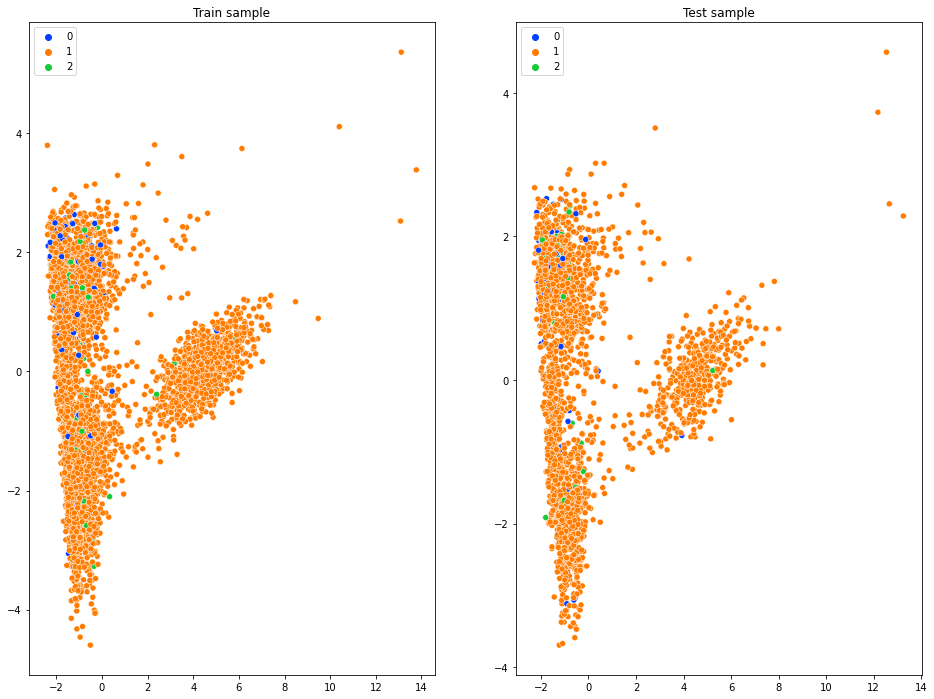

In [7]:
plot_clustering(kmedoids, X_train, X_test)

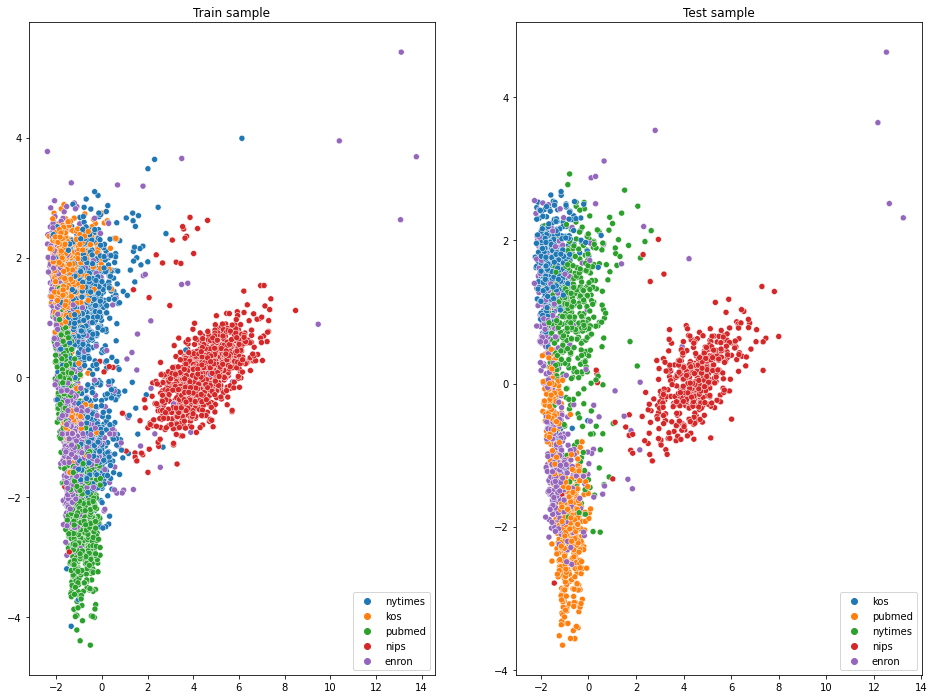

In [8]:
plot_clustering_from_clusters(X_train, X_test, train_clusters, test_clusters)